In [1]:
# corr()
# srt.contains()
# value_counts()
# sort_values()
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

,영화명,개봉일,영화유형,국적,스크린수,매출액,관객수,장르,등급
1,명량,2014-07-30,개봉영화,한국,"1,587","135,748,398,910","17,613,682",사극,15세이상관람가
2,극한직업,2019-01-23,개봉영화,한국,"1,978","139,647,979,516","16,264,944",코미디,15세이상관람가
3,신과함께-죄와 벌,2017-12-20,개봉영화,한국,"1,912","115,698,654,137","14,410,754",판타지,12세이상관람가
4,국제시장,2014-12-17,개봉영화,한국,966,"110,828,014,630","14,245,998",드라마,12세이상관람가
5,어벤져스: 엔드게임,2019-04-24,개봉영화,미국,"2,835","122,182,694,160","13,934,592",액션,12세이상관람가


In [32]:
# From kobis.or.kr
#CSV파일 건너뛰어 읽기
df = pd.read_csv('./ad/KOBIS_개봉일람_2019-10-26.csv',skiprows=5)
df.rename(columns={'전국':'스크린수', '전국.1':'매출액', '전국.2':'관객수','서울':'서울매출액', '서울.1':'서울관객수'}, inplace=True)
df.drop(0, inplace=True)
df.drop(['순번', '제작사', '수입사', '배급사', '서울매출액', '서울관객수', '감독', '영화구분', '영화형태'], axis=1, inplace=True)
# null확인
print(df.isnull().sum(axis=0))
#  null 0으로 채우기
df.fillna('0', inplace=True)
# 숫자 데이터 정수형으로
df['스크린수'] = df.스크린수.apply(lambda x: int(x.replace(',','')))
df['매출액'] = df.매출액.apply(lambda x: int(x.replace(',','')))
df['관객수'] = df.관객수.apply(lambda x: int(x.replace(',','')))
df.info()

영화명       0
개봉일      18
영화유형      0
국적        9
스크린수      0
매출액     227
관객수       0
장르      101
등급       50
dtype: int64
<class 'pandas.core.frame.DataFrame'>
Int64Index: 19704 entries, 1 to 19704
Data columns (total 9 columns):
영화명     19704 non-null object
개봉일     19704 non-null object
영화유형    19704 non-null object
국적      19704 non-null object
스크린수    19704 non-null int64
매출액     19704 non-null int64
관객수     19704 non-null int64
장르      19704 non-null object
등급      19704 non-null object
dtypes: int64(3), object(6)
memory usage: 1.5+ MB


국적
한국     8984898889995
미국     7603096955226
일본      278292077442
영국      170372907804
프랑스     130439668878
Name: 매출액, dtype: int64
국적
한국          1.611063e+09
미국          1.325736e+09
벨기에         9.617898e+08
남아프리카공화국    7.712174e+08
아이슬란드       4.042822e+08
Name: 매출액, dtype: float64
국적
한국     1621837250
미국     1228810827
일본       53483206
영국       29385938
프랑스      21751672
Name: 관객수, dtype: int64
국적
0           349860.888889
한국          290808.185404
미국          214265.183435
벨기에         125539.823529
남아프리카공화국    108967.600000
Name: 관객수, dtype: float64


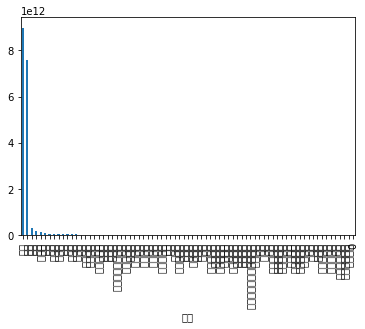

In [46]:
# 국가별 매출액합 상위 5개국
print(df.groupby('국적').매출액.sum().sort_values(ascending=False).head())

# 매출액
print(df.groupby('국적').매출액.mean().sort_values(ascending=False).head())
print(df.groupby('국적').관객수.sum().sort_values(ascending=False).head())
print(df.groupby('국적').관객수.mean().sort_values(ascending=False).head())



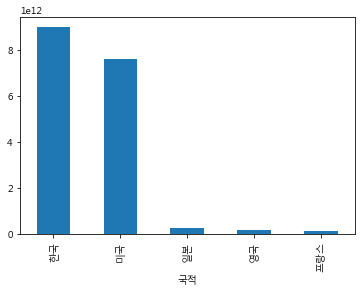

In [73]:
# matplotlib 한글화 코드
import matplotlib as mpl

import matplotlib.font_manager as fm



mpl.rcParams['axes.unicode_minus'] = False



path = 'C:/Windows/Fonts/malgun.ttf'

font_name = fm.FontProperties(fname=path, size=50).get_name()

plt.rc('font', family=font_name)
df.groupby('국적').매출액.sum().sort_values(ascending=False).head().plot(kind='bar')

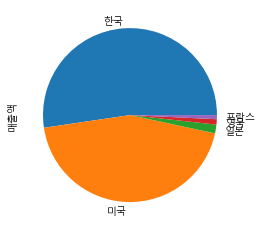

In [72]:
df.groupby('국적').매출액.sum().sort_values(ascending=False).head(5).plot(kind='pie')

In [54]:
# 매출액이 가장 큰 영화는
print(df[df.매출액 == df.매출액.max()])
# 관객수가 가장 많았던 영화
print(df[df.관객수 == df.관객수.max()])

    영화명         개봉일  영화유형  국적  스크린수           매출액       관객수   장르        등급
2  극한직업  2019-01-23  개봉영화  한국  1978  139647979516  16264944  코미디  15세이상관람가
  영화명         개봉일  영화유형  국적  스크린수           매출액       관객수  장르        등급
1  명량  2014-07-30  개봉영화  한국  1587  135748398910  17613682  사극  15세이상관람가


국적
미국      5735
한국      5577
일본      3474
홍콩       896
프랑스      823
영국       623
중국       381
독일       328
이탈리아     293
캐나다      225
Name: 영화명, dtype: int64


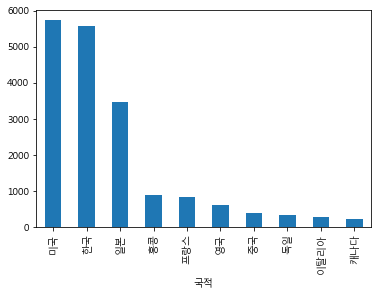

In [67]:
# 각 국가별 갯수 상위 10개국
print(df.groupby('국적').영화명.count().sort_values(ascending=False).head(10))

df.groupby('국적').영화명.count().sort_values(ascending=False).head(10).plot(kind='bar')


국적
한국          1.611063e+09
미국          1.325736e+09
벨기에         9.617898e+08
남아프리카공화국    7.712174e+08
아이슬란드       4.042822e+08
인도          3.999998e+08
영국          2.734718e+08
아일랜드        2.669885e+08
페루          1.913412e+08
중국          1.770558e+08
Name: 매출액, dtype: float64


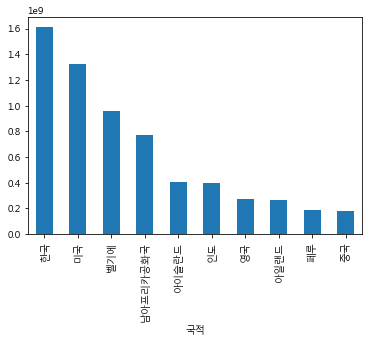

In [66]:
# 각 국가별 평균매출액 상위10개국
print(df.groupby('국적').매출액.mean().sort_values(ascending=False).head(10))
df.groupby('국적').매출액.mean().sort_values(ascending=False).head(10).plot(kind='bar')

In [70]:
ubd = int(df[df.영화명=='자전차왕 엄복동'].관객수)
ubd

172212

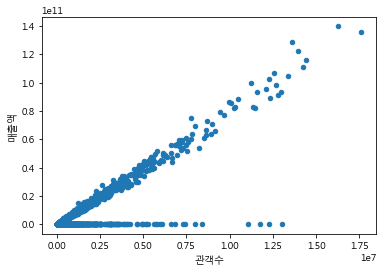

In [74]:
# 그래프를 통해서 매출액과 관객수/ 매출액과 스크린수의 관계를 보이시오
df.plot(x='관객수', y='매출액', kind='scatter')

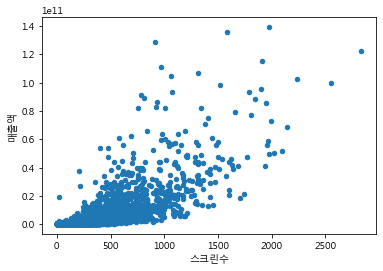

In [75]:
df.plot(x='스크린수', y='매출액', kind='scatter')

In [77]:
df.head(3)

,영화명,개봉일,영화유형,국적,스크린수,매출액,관객수,장르,등급
1,명량,2014-07-30,개봉영화,한국,1587,135748398910,17613682,사극,15세이상관람가
2,극한직업,2019-01-23,개봉영화,한국,1978,139647979516,16264944,코미디,15세이상관람가
3,신과함께-죄와 벌,2017-12-20,개봉영화,한국,1912,115698654137,14410754,판타지,12세이상관람가


month
01    1462
02    1401
03    1623
04    1686
05    1630
06    1622
07    1707
08    1731
09    1774
10    1547
11    1796
12    1707
Name: 영화명, dtype: int64


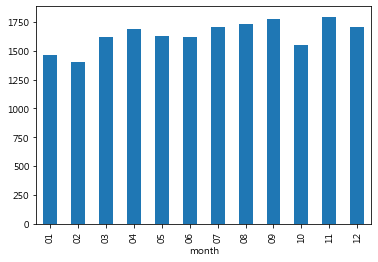

In [97]:
# 월별 개봉영화 갯수
df.drop(df[df.개봉일=='0'].index, inplace=True)
df['month'] = df.개봉일.apply(lambda x:x.split('-')[1])
df.head(3)
print(df.groupby('month').영화명.count())
df.groupby('month').영화명.count().plot(kind='bar')

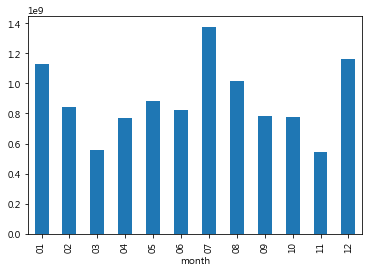

In [96]:
df.groupby('month').매출액.mean().plot(kind='bar')

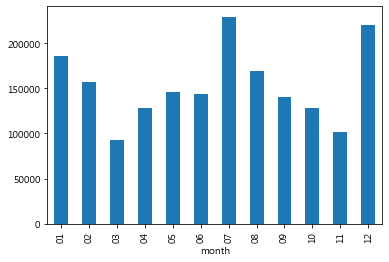

In [98]:
df.groupby('month').관객수.mean().plot(kind='bar')

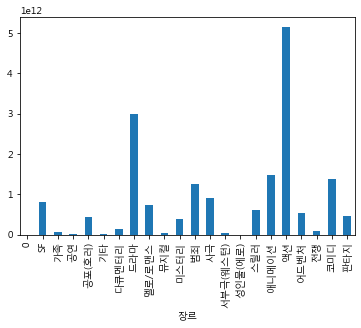

In [101]:
# 영화장르별 수익성

# 영화장르별 매출액합
df.groupby('장르').매출액.sum().plot(kind='bar')


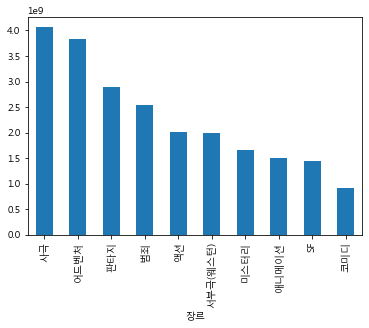

In [105]:
# 영화장르별 매출액평균
df.groupby('장르').매출액.mean().sort_values(ascending=False).head(10).plot(kind='bar')

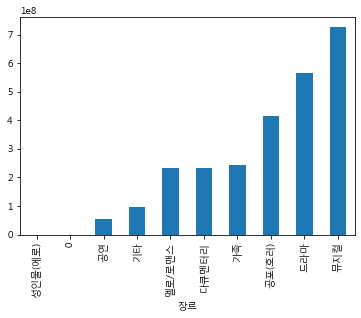

In [106]:
# 영화장르별 매출액평균
df.groupby('장르').매출액.mean().sort_values().head(10).plot(kind='bar')

In [115]:
df.매출액.quantile(0.95)

2701821536.5

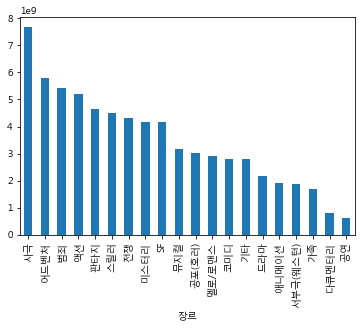

In [124]:
df[(df.매출액<df.매출액.quantile(0.99))&(df.매출액>100000000)].groupby('장르').매출액.mean().sort_values(ascending=False).plot(kind='bar')

In [164]:
nattop = dict(df.groupby('국적').매출액.max())
for n in nattop:
    if nattop[n]!=0:
        print(n)
        print(df[(df.국적==n)&(df.매출액==nattop[n])])


그리스
             영화명         개봉일  영화유형   국적  스크린수        매출액    관객수   장르  \
3215  나의 사랑, 그리스  2017-04-20  개봉영화  그리스   123  241875000  30181  드라마   

            등급 month  year  
3215  15세이상관람가    04  2017  
기타
       영화명         개봉일  영화유형  국적  스크린수         매출액     관객수   장르        등급  \
2068  가버나움  2019-01-24  개봉영화  기타   111  1182486219  142622  드라마  15세이상관람가   

     month  year  
2068    01  2019  
남아프리카공화국
                    영화명         개봉일  영화유형        국적  스크린수         매출액     관객수  \
1245  잠베지아: 신비한 나무섬의 비밀  2012-12-25  개봉영화  남아프리카공화국   273  3333947000  472692   

         장르     등급 month  year  
1245  애니메이션  전체관람가    12  2012  
네덜란드
         영화명         개봉일  영화유형    국적  스크린수       매출액   관객수      장르        등급  \
4213  킬 미 달링  2016-01-28  개봉영화  네덜란드    58  72912300  9558  멜로/로맨스  15세이상관람가   

     month  year  
4213    01  2016  
노르웨이
               영화명         개봉일  영화유형    국적  스크린수        매출액    관객수     장르  \
2815  꼬마영웅 경찰차 프로디  2013-04-11  개봉영화  노르웨이   229  343590000  52154  애니메이션

2253    05  2008  
터키
      영화명         개봉일  영화유형  국적  스크린수        매출액    관객수   장르        등급 month  \
2963  아일라  2018-06-21  개봉영화  터키   371  331882900  43612  드라마  15세이상관람가    06   

      year  
2963  2018  
팔레스타인
               영화명         개봉일  영화유형     국적  스크린수       매출액   관객수   장르  \
5280  노래로 쏘아 올린 기적  2017-08-17  개봉영화  팔레스타인    13  20481200  3182  드라마   

            등급 month  year  
5280  12세이상관람가    08  2017  
페루
                 영화명         개봉일  영화유형  국적  스크린수        매출액    관객수     장르  \
2343  로덴시아: 마법왕국의 전설  2013-10-02  개봉영화  페루   221  632768500  98575  애니메이션   

         등급 month  year  
2343  전체관람가    10  2013  
포르투갈
             영화명         개봉일  영화유형    국적  스크린수       매출액   관객수  장르       등급  \
4849  나폴레옹 토레스전투  2013-11-14  개봉영화  포르투갈     5  10528000  5032  전쟁  청소년관람불가   

     month  year  
4849    11  2013  
폴란드
       영화명         개봉일  영화유형   국적  스크린수        매출액    관객수      장르        등급  \
3304  콜드 워  2019-02-07  개봉영화  폴란드    65  220783373  26784  멜로/로맨스  15세이상관람가   

   

In [163]:
gentop = dict(df.groupby('장르').매출액.max())
for g in gentop:
    if gentop[g]!=0 and g!='0':
        print(g)
        print(df[(df.장르==g)&(df.매출액==gentop[g])].영화명)

SF
6    아바타
Name: 영화명, dtype: object
가족
575    토이 스토리 3
Name: 영화명, dtype: object
공연
1457    러브 유어셀프 인 서울
Name: 영화명, dtype: object
공포(호러)
140    연가시
Name: 영화명, dtype: object
기타
1468    브링 더 소울 : 더 무비
Name: 영화명, dtype: object
다큐멘터리
122    님아, 그 강을 건너지 마오
Name: 영화명, dtype: object
드라마
4    국제시장
Name: 영화명, dtype: object
멜로/로맨스
65    늑대소년
Name: 영화명, dtype: object
뮤지컬
358    맘마미아!2
Name: 영화명, dtype: object
미스터리
61    곡성
Name: 영화명, dtype: object
범죄
28    검사외전
Name: 영화명, dtype: object
사극
1    명량
Name: 영화명, dtype: object
서부극(웨스턴)
64    좋은 놈, 나쁜 놈, 이상한 놈
Name: 영화명, dtype: object
성인물(에로)
5864    아메리카파이: 19금 여배우들
Name: 영화명, dtype: object
스릴러
86    숨바꼭질
Name: 영화명, dtype: object
애니메이션
24    겨울왕국
Name: 영화명, dtype: object
액션
5    어벤져스: 엔드게임
Name: 영화명, dtype: object
어드벤처
12    알라딘
Name: 영화명, dtype: object
전쟁
58    인천상륙작전
Name: 영화명, dtype: object
코미디
2    극한직업
Name: 영화명, dtype: object
판타지
3    신과함께-죄와 벌
Name: 영화명, dtype: object


In [142]:
df.head()

,영화명,개봉일,영화유형,국적,스크린수,매출액,관객수,장르,등급,month
1,명량,2014-07-30,개봉영화,한국,1587,135748398910,17613682,사극,15세이상관람가,07
2,극한직업,2019-01-23,개봉영화,한국,1978,139647979516,16264944,코미디,15세이상관람가,01
3,신과함께-죄와 벌,2017-12-20,개봉영화,한국,1912,115698654137,14410754,판타지,12세이상관람가,12
4,국제시장,2014-12-17,개봉영화,한국,966,110828014630,14245998,드라마,12세이상관람가,12
5,어벤져스: 엔드게임,2019-04-24,개봉영화,미국,2835,122182694160,13934592,액션,12세이상관람가,04


In [149]:
# 연도별 개봉영화 갯수
df['year'] = df.개봉일.apply(lambda x:x.split('-')[0])

print(df.groupby('year').영화명.count())
# 연도별 영화 평균 매출
print(df.groupby('year').매출액.mean().sort_values(ascending=False).head(13))

year
1962       1
1968       1
1971       3
1972       3
1973       4
1974       2
1975       1
1976       1
1977       3
1978       4
1979      15
1980     112
1981     120
1982     128
1983     127
1984      98
1985     116
1986     133
1987     160
1988     236
1989     336
1990     358
1991     362
1992     412
1993     424
1994     434
1995     365
1996     372
1997     328
1998     284
1999     273
2000     327
2001     285
2002     297
2003     257
2004     267
2005     297
2006     345
2007     391
2008     380
2009     361
2010     427
2011     439
2012     631
2013     905
2014    1095
2015    1202
2016    1569
2017    1764
2018    1863
2019    1368
Name: 영화명, dtype: int64
year
2009    3.204051e+09
2011    2.792910e+09
2008    2.642987e+09
2010    2.545375e+09
2012    2.305891e+09
2013    1.725861e+09
2014    1.534787e+09
2015    1.375233e+09
2016    1.092846e+09
2019    1.025367e+09
2017    1.022192e+09
2018    9.292399e+08
2007    1.164132e+05
Name: 매출액, dtype: float64


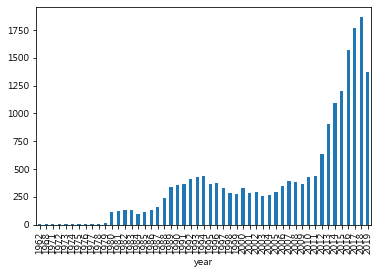

In [150]:
df.groupby('year').영화명.count().plot(kind='bar')

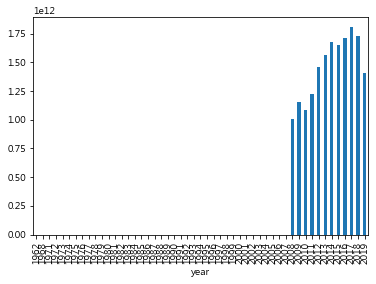

In [156]:
df.groupby('year').매출액.sum().plot(kind='bar')

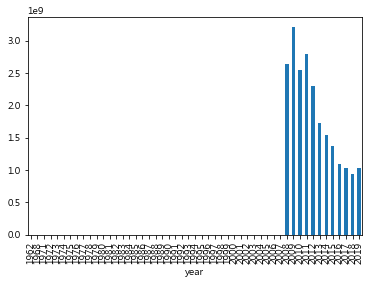

In [155]:
df.groupby('year').매출액.mean().plot(kind='bar')

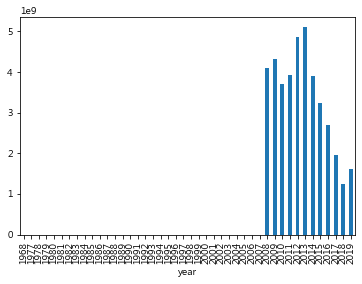

In [157]:
df[df.국적=='한국'].groupby('year').매출액.mean().plot(kind='bar')

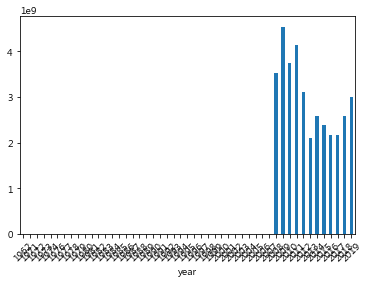

In [174]:
df[df.국적=='미국'].groupby('year').매출액.mean().plot(kind='bar', rot=45)
